### ***Reza Dalir - 610300050***

### ***Problem 1: Diagnosis of COVID-19 Patients Using X-Ray Images***
***
***

### ***1.1- Introduction:***

### ***Import Requred libraries***

In [1]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
from torchvision import transforms
#-----------------------------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import tensorflow as tf
#----------------------------------
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

### ***Downloading the DataSet:***

In [2]:
import kagglehub
path = kagglehub.dataset_download("prashant268/chest-xray-covid19-pneumonia")

***
***
### ***1.2- Dataset Analysis***

In [3]:
root = "/kaggle/input/chest-xray-covid19-pneumonia/Data/"
train_dir = os.listdir(root + "train")
print("class names: ", train_dir)
number_of_classes_train = {}
number_of_classes_test = {}
for folder in train_dir:
  print(f"number of classes in the {folder} class in the train set: ", len(os.listdir(root + "train/" + folder)))
  number_of_classes_train[folder] = len(os.listdir(root + "train/" + folder))
print("----------------------------------------------")
for folder in train_dir:
  print(f"number of classes in the {folder} class in the test set: ", len(os.listdir(root + "test/" + folder)))
  number_of_classes_test[folder] = len(os.listdir(root + "test/" + folder))

class names:  ['PNEUMONIA', 'NORMAL', 'COVID19']
number of classes in the PNEUMONIA class in the train set:  3418
number of classes in the NORMAL class in the train set:  1266
number of classes in the COVID19 class in the train set:  460
----------------------------------------------
number of classes in the PNEUMONIA class in the test set:  855
number of classes in the NORMAL class in the test set:  317
number of classes in the COVID19 class in the test set:  116


### ***finding the formats of the images:***

In [4]:
formats = set()
for folder in train_dir:
  for data_type in ["train/", "test/"]:
    for image in os.listdir(root + data_type + folder):
      formats.add(image.split(".")[1])
print(formats)

{'jpg'}


### ***Plotting the Distribution of Classes:***

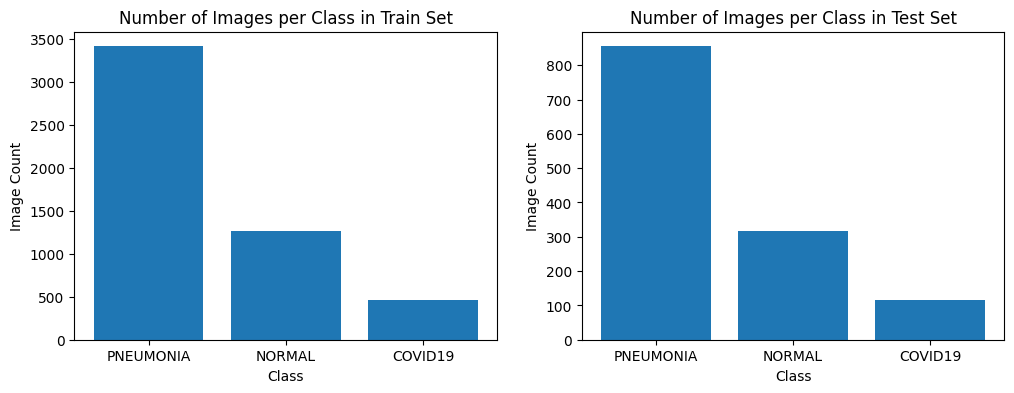

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(list(number_of_classes_train.keys()), list(number_of_classes_train.values()))
axes[0].set_title("Number of Images per Class in Train Set")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Image Count")

axes[1].bar(list(number_of_classes_test.keys()), list(number_of_classes_test.values()))
axes[1].set_title("Number of Images per Class in Test Set")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Image Count")

plt.show()

***
***
## ***1.3- Preprocessing Data:***

In [6]:
train_min = 460
test_min = 116
root = "/kaggle/input/chest-xray-covid19-pneumonia/Data/"
train_dir = os.listdir(root + "train")
test_dir = os.listdir(root + "test")
selected_train = {}
selected_test = {}
for folder in train_dir:
    selected_train[folder] = random.sample(os.listdir(root + "train/" + folder), train_min)
for folder in test_dir:
    selected_test[folder] = random.sample(os.listdir(root + "test/" + folder), test_min)
print(selected_train)
print(selected_test)

{'PNEUMONIA': ['PNEUMONIA(1819).jpg', 'PNEUMONIA(2537).jpg', 'PNEUMONIA(227).jpg', 'PNEUMONIA(2483).jpg', 'PNEUMONIA(488).jpg', 'PNEUMONIA(385).jpg', 'PNEUMONIA(2782).jpg', 'PNEUMONIA(2602).jpg', 'PNEUMONIA(1394).jpg', 'PNEUMONIA(2914).jpg', 'PNEUMONIA(194).jpg', 'PNEUMONIA(1945).jpg', 'PNEUMONIA(555).jpg', 'PNEUMONIA(350).jpg', 'PNEUMONIA(3111).jpg', 'PNEUMONIA(1008).jpg', 'PNEUMONIA(2413).jpg', 'PNEUMONIA(800).jpg', 'PNEUMONIA(1686).jpg', 'PNEUMONIA(871).jpg', 'PNEUMONIA(2055).jpg', 'PNEUMONIA(484).jpg', 'PNEUMONIA(1584).jpg', 'PNEUMONIA(2715).jpg', 'PNEUMONIA(723).jpg', 'PNEUMONIA(2558).jpg', 'PNEUMONIA(3211).jpg', 'PNEUMONIA(561).jpg', 'PNEUMONIA(1651).jpg', 'PNEUMONIA(2883).jpg', 'PNEUMONIA(569).jpg', 'PNEUMONIA(2518).jpg', 'PNEUMONIA(2691).jpg', 'PNEUMONIA(1572).jpg', 'PNEUMONIA(1954).jpg', 'PNEUMONIA(2608).jpg', 'PNEUMONIA(2202).jpg', 'PNEUMONIA(2029).jpg', 'PNEUMONIA(2899).jpg', 'PNEUMONIA(1311).jpg', 'PNEUMONIA(362).jpg', 'PNEUMONIA(2822).jpg', 'PNEUMONIA(1790).jpg', 'PNEUMONI

### ***Data Augmentation for Train Class:***

In [7]:
augmentations = [
    transforms.RandomRotation(degrees=20),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomVerticalFlip(p=1.0),
    transforms.ColorJitter(brightness=0.5, contrast=0.5),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),
    transforms.GaussianBlur(kernel_size=5)
]
root = "/kaggle/input/chest-xray-covid19-pneumonia/Data/"
output_dir_train = "new_dataset/train/"
for folder in train_dir:
    os.makedirs(output_dir_train + folder, exist_ok=True)
    for x in selected_train[folder]:
        img = Image.open(root + "train/" + folder + "/" + x).convert("RGB")
        for i, augmentation in enumerate(augmentations):
            augmented = augmentation(img)
            augmented.save(output_dir_train + folder + "/" + f"aug{i}_" + x)

### ***Saving the Selected Data of the TestSet:***

In [ ]:
root = "/kaggle/input/chest-xray-covid19-pneumonia/Data/"
output_dir_test = "new_dataset/test/"
for folder in test_dir:
    os.makedirs(output_dir_test + folder, exist_ok=True)
    for x in selected_test[folder]:
        img = Image.open(root + "test/" + folder + "/" + x).convert("RGB")
        img.save(output_dir_test + folder + "/" + f"aug{i}_" + x)

### ***Plotting an Image and Its Augments:***

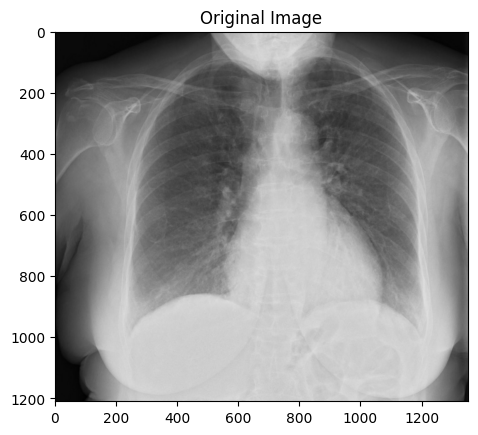

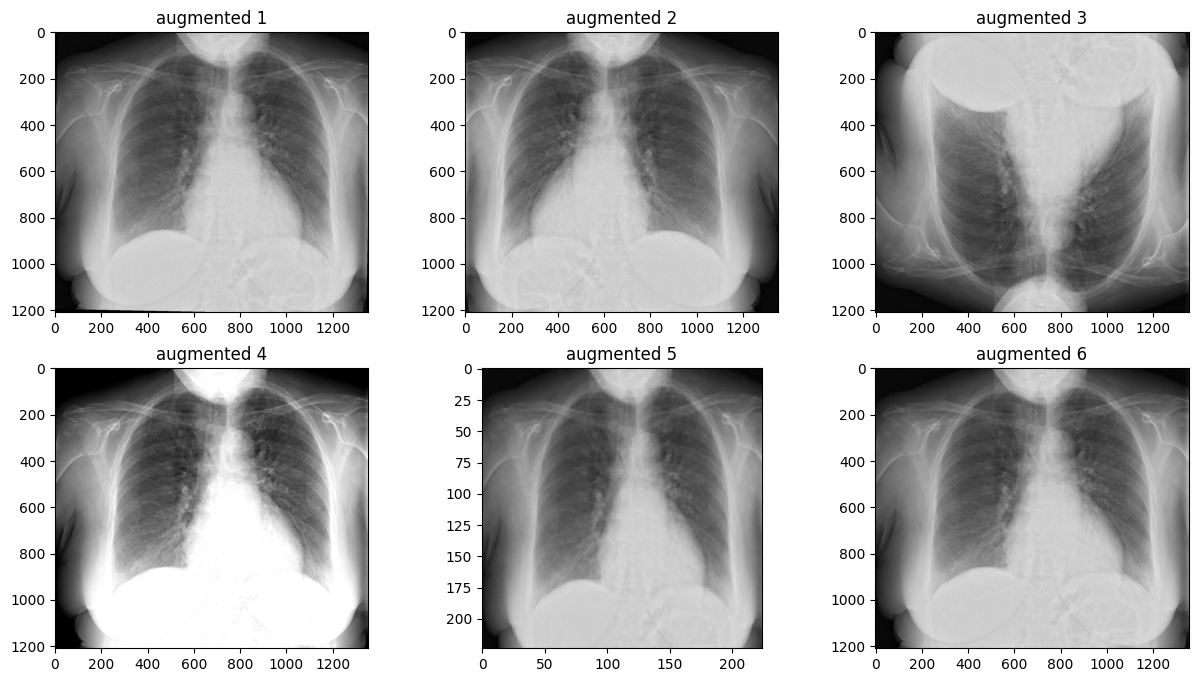

In [9]:
img = Image.open("/kaggle/input/chest-xray-covid19-pneumonia/Data/train/COVID19/COVID19(100).jpg")

plt.imshow(img)
plt.title("Original Image")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for i in range(2):
  for j in range(3):
    img = Image.open(f"new_dataset/train/COVID19/aug{i*3+j}_COVID19(100).jpg")
    axes[i][j].imshow(img)
    axes[i][j].set_title(f"augmented {i*3+j+1}")
plt.show()

***
***
## ***1.4- Model Preparation:***

### ***Defining the Model Based on the Main Article:***

In [10]:
input_shape = (224, 224, 3)
dropout_rate = 0.2
kernel_size = (3, 3)
pool_size = (2, 2)

model = Sequential()

#input
model.add(Conv2D(64, kernel_size, padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#hidden1
model.add(Conv2D(64, kernel_size, padding='same'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#hidden2
model.add(Conv2D(128, kernel_size, padding='same'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#hidden3
model.add(Conv2D(128, kernel_size, padding='same'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#hidden4
model.add(Conv2D(256, kernel_size, padding='same'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#hidden5
model.add(Conv2D(256, kernel_size, padding='same'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

#output
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 256)      │         1,02

 Total params: 2,464,323 (9.40 MB)

 Trainable params: 2,460,995 (9.39 MB)

 Non-trainable params: 3,328 (13.00 KB)

### ***Defining Train, Validation and Test Loader:***

In [ ]:
train_loader = tf.keras.utils.image_dataset_from_directory(
    "/content/new_dataset/train",
    validation_split=0.35,
    subset="training",
    seed=2025,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_loader = tf.keras.utils.image_dataset_from_directory(
    "/content/new_dataset/train",
    validation_split=0.35,
    subset="validation",
    seed=2025,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

test_loader = tf.keras.utils.image_dataset_from_directory(
    "/content/new_dataset/test",
    image_size=(224, 224),
    batch_size=32,
    shuffle=False,
    label_mode='categorical'
)

AUTOTUNE = tf.data.AUTOTUNE
train_loader = train_loader.shuffle(100).prefetch(buffer_size=AUTOTUNE)
val_loader = val_loader.prefetch(buffer_size=AUTOTUNE)

Found 8280 files belonging to 3 classes.
Using 5382 files for training.
Found 8280 files belonging to 3 classes.
Using 2898 files for validation.
Found 348 files belonging to 3 classes.


***
***
## ***1.5- Training and Evaluating the Model:***

### ***Training the Model:***

In [12]:
history = model.fit(train_loader, validation_data=val_loader, epochs=50)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 85s 290ms/step - accuracy: 0.6948 - loss: 0.7315 - val_accuracy: 0.5035 - val_loss: 1.5683
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 51s 192ms/step - accuracy: 0.8965 - loss: 0.2915 - val_accuracy: 0.7253 - val_loss: 0.6521
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 222ms/step - accuracy: 0.9078 - loss: 0.2387 - val_accuracy: 0.8713 - val_loss: 0.3236
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 227ms/step - accuracy: 0.9309 - loss: 0.1903 - val_accuracy: 0.9044 - val_loss: 0.2762
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 46s 185ms/step - accuracy: 0.9444 - loss: 0.1601 - val_accuracy: 0.9048 - val_loss: 0.2667
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 228ms/step - accuracy: 0.9609 - loss: 0.1131 - val_accuracy: 0.8899 - val_loss: 0.2911
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - accuracy: 0.9528 - loss: 0.1395 - val_accuracy: 0.8320 - val_loss: 0.4408
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - accuracy: 0.9578 - loss: 0

### ***Plotting Accuracy and Loss During the Training:***

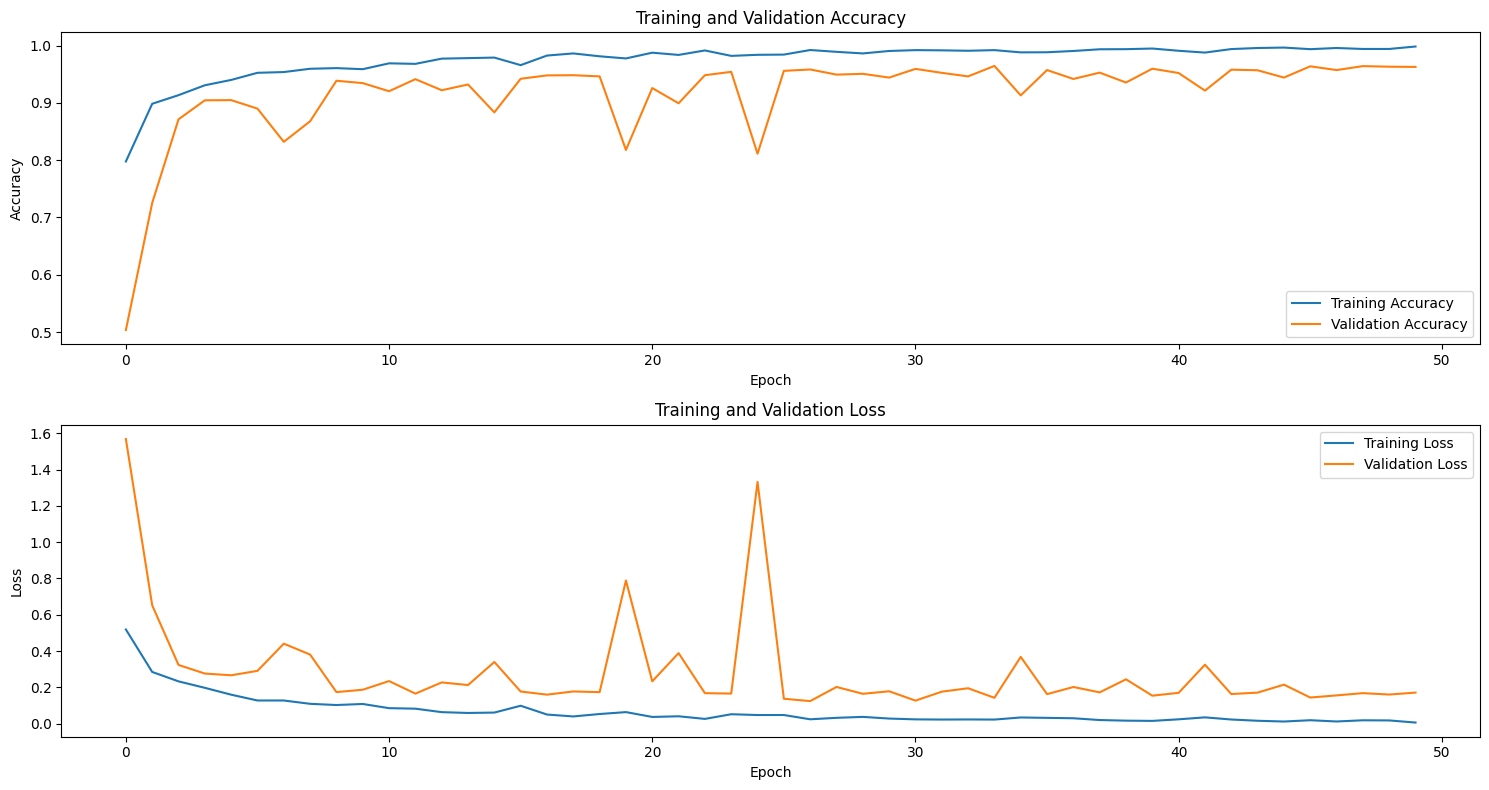

In [13]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

axes[0].plot(epochs_range, acc, label='Training Accuracy')
axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')

axes[1].plot(epochs_range, loss, label='Training Loss')
axes[1].plot(epochs_range, val_loss, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

### ***Testing the Model:***

In [14]:
pred_probs = model.predict(test_loader)
pred_classes = tf.argmax(pred_probs, axis=1)

true_labels = tf.concat([y for x, y in test_loader], axis=0)
true_classes = tf.argmax(true_labels, axis=1)

test_loss, test_accuracy = model.evaluate(test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 319ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9806 - loss: 0.0561
Test Accuracy: 0.9741


### ***Evaluating the Model:***

              precision    recall  f1-score   support

     COVID19       1.00      0.98      0.99       116
      NORMAL       0.96      0.97      0.97       116
   PNEUMONIA       0.97      0.97      0.97       116

    accuracy                           0.97       348
   macro avg       0.97      0.97      0.97       348
weighted avg       0.97      0.97      0.97       348



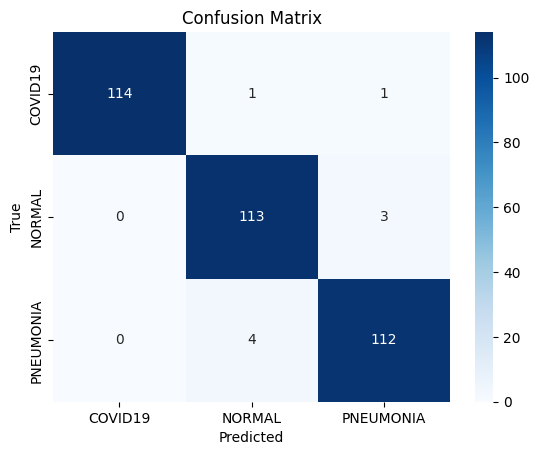

In [15]:
y_true = true_classes.numpy()
y_pred = pred_classes.numpy()

print(classification_report(y_true, y_pred, target_names=test_loader.class_names))


cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_loader.class_names, yticklabels=test_loader.class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


***
***
## ***1.6- Transfer Learning:***

### ***Defining the Model with MobileNetV2 As the Base Model:***

In [16]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_MobileNetV2 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_MobileNetV2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_MobileNetV2.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### ***Training MobileNetV2:***

In [17]:
history_MobileNetV2 = model_MobileNetV2.fit(train_loader, validation_data=val_loader, epochs=50)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 62s 224ms/step - accuracy: 0.6651 - loss: 0.7722 - val_accuracy: 0.8361 - val_loss: 0.4336
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 66s 167ms/step - accuracy: 0.8457 - loss: 0.4093 - val_accuracy: 0.8596 - val_loss: 0.3622
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.8531 - loss: 0.3761 - val_accuracy: 0.8675 - val_loss: 0.3424
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 158ms/step - accuracy: 0.8782 - loss: 0.3186 - val_accuracy: 0.8554 - val_loss: 0.3539
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 163ms/step - accuracy: 0.8942 - loss: 0.2965 - val_accuracy: 0.8844 - val_loss: 0.3119
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 200ms/step - accuracy: 0.8977 - loss: 0.2605 - val_accuracy: 0.8792 - val_loss: 0.3073
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 43s 168ms/step - accuracy: 0.8998 - loss: 0.2594 - val_accuracy: 0.8872 - val_loss: 0.2911
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.9106 - loss: 0

### ***Plotting Accuracy and Loss During the Training :***

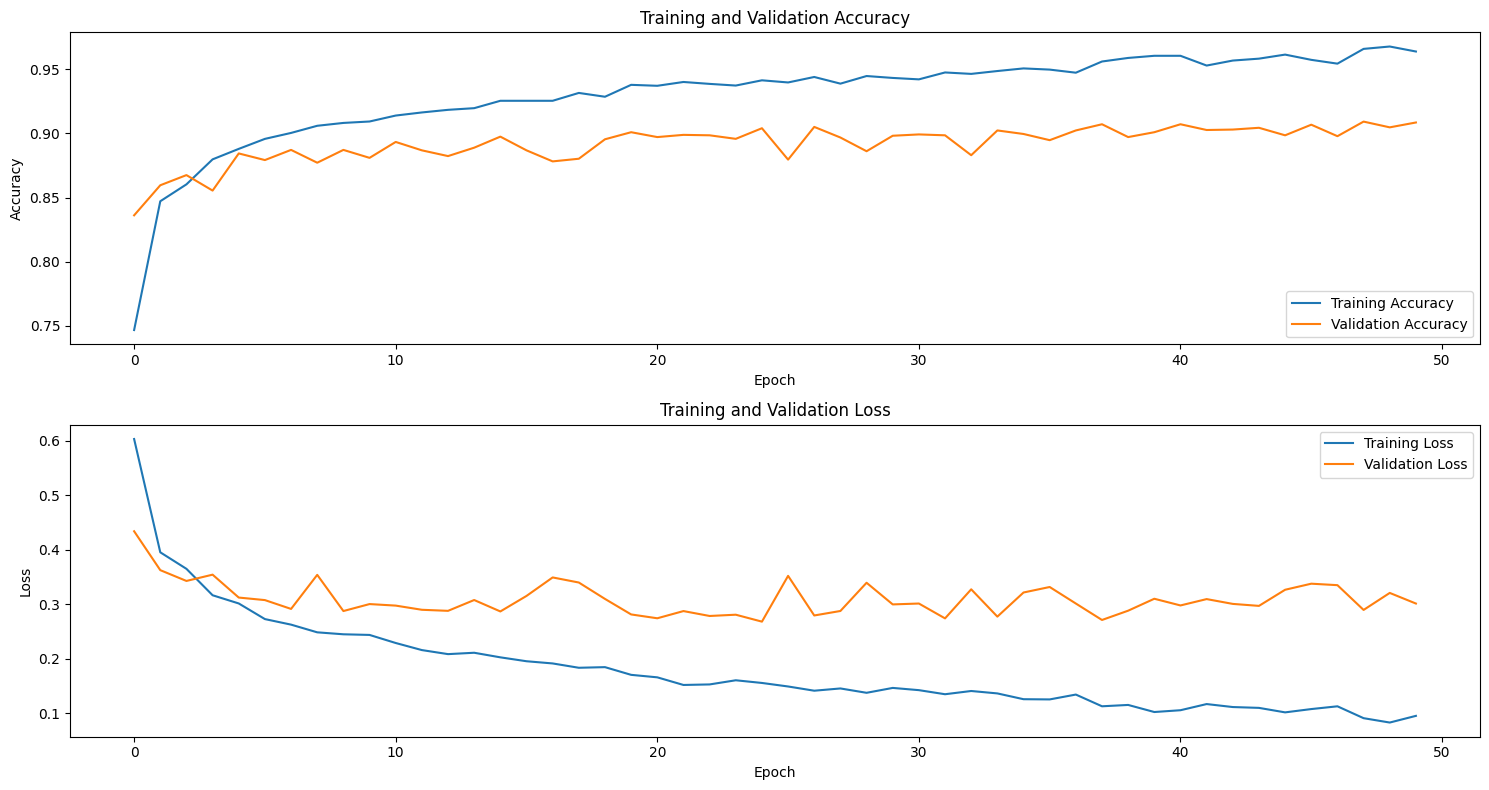

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
acc = history_MobileNetV2.history['accuracy']
val_acc = history_MobileNetV2.history['val_accuracy']
loss = history_MobileNetV2.history['loss']
val_loss = history_MobileNetV2.history['val_loss']
epochs_range = range(len(acc))

axes[0].plot(epochs_range, acc, label='Training Accuracy')
axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')

axes[1].plot(epochs_range, loss, label='Training Loss')
axes[1].plot(epochs_range, val_loss, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

### ***Evaluating MobileNetV2 with TestSet:***

In [19]:
pred_probs = model_MobileNetV2.predict(test_loader)
pred_classes = tf.argmax(pred_probs, axis=1)

true_labels = tf.concat([y for x, y in test_loader], axis=0)
true_classes = tf.argmax(true_labels, axis=1)

test_loss, test_accuracy = model_MobileNetV2.evaluate(test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 599ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.9378 - loss: 0.2215
Test Accuracy: 0.9167


              precision    recall  f1-score   support

     COVID19       0.99      0.94      0.96       116
      NORMAL       0.85      0.96      0.90       116
   PNEUMONIA       0.93      0.85      0.89       116

    accuracy                           0.92       348
   macro avg       0.92      0.92      0.92       348
weighted avg       0.92      0.92      0.92       348



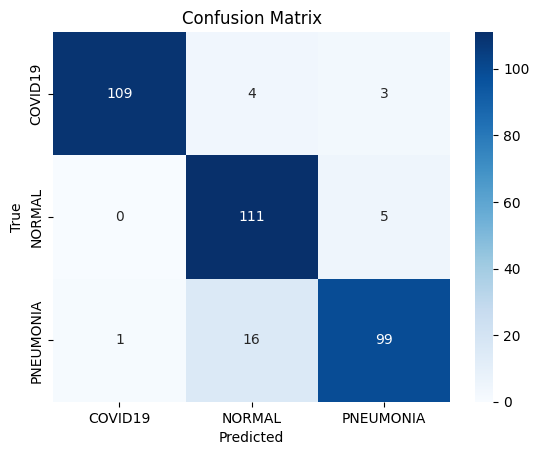

In [20]:
y_true = true_classes.numpy()
y_pred = pred_classes.numpy()

print(classification_report(y_true, y_pred, target_names=test_loader.class_names))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_loader.class_names, yticklabels=test_loader.class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


***
### ***Defining the Model with VGG16 As the Base Model:***

In [2]:
base_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_VGG16 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_VGG16.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_VGG16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,561,795 (105.14 MB)

 Trainable params: 12,847,107 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### ***Training VGG16:***

In [4]:
history_VGG16 = model_VGG16.fit(train_loader, validation_data=val_loader, epochs=50)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 91s 347ms/step - accuracy: 0.8474 - loss: 11.7652 - val_accuracy: 0.9313 - val_loss: 0.3780
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 60s 256ms/step - accuracy: 0.9481 - loss: 0.2279 - val_accuracy: 0.9576 - val_loss: 0.2083
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 286ms/step - accuracy: 0.9737 - loss: 0.0875 - val_accuracy: 0.9482 - val_loss: 0.3809
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 58s 257ms/step - accuracy: 0.9729 - loss: 0.1034 - val_accuracy: 0.9548 - val_loss: 0.2344
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 285ms/step - accuracy: 0.9749 - loss: 0.1116 - val_accuracy: 0.9655 - val_loss: 0.2359
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 64s 287ms/step - accuracy: 0.9716 - loss: 0.1347 - val_accuracy: 0.9662 - val_loss: 0.1429
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 257ms/step - accuracy: 0.9770 - loss: 0.0801 - val_accuracy: 0.9607 - val_loss: 0.2307
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 58s 254ms/step - accuracy: 0.9742 - loss: 

### ***Plotting Accuracy and Loss During the Training:***

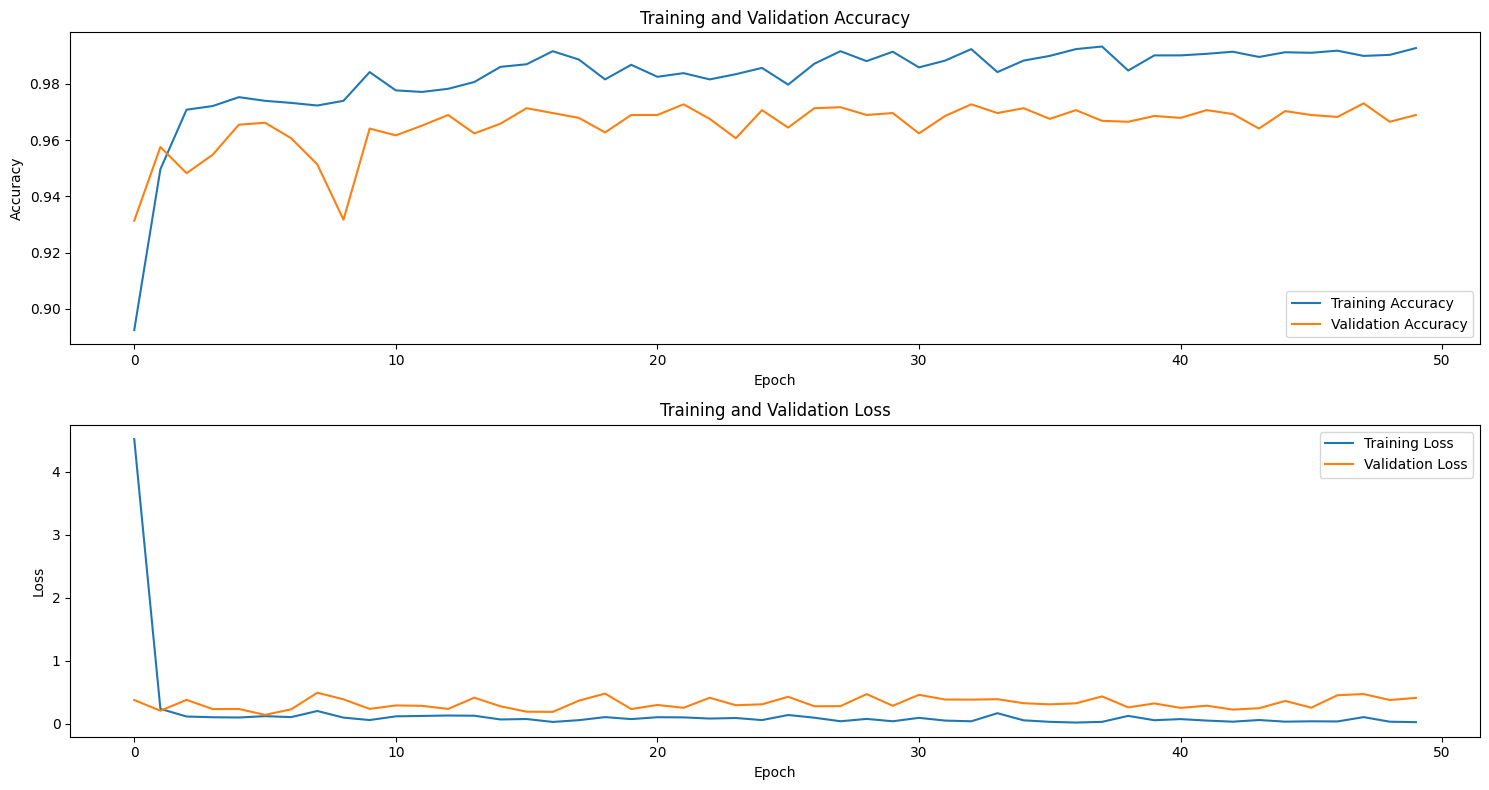

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
acc = history_VGG16.history['accuracy']
val_acc = history_VGG16.history['val_accuracy']
loss = history_VGG16.history['loss']
val_loss = history_VGG16.history['val_loss']
epochs_range = range(len(acc))

axes[0].plot(epochs_range, acc, label='Training Accuracy')
axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')

axes[1].plot(epochs_range, loss, label='Training Loss')
axes[1].plot(epochs_range, val_loss, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

### ***Evaluating VGG16 with TestSet:***

In [6]:
pred_probs = model_VGG16.predict(test_loader)
pred_classes = tf.argmax(pred_probs, axis=1)

true_labels = tf.concat([y for x, y in test_loader], axis=0)
true_classes = tf.argmax(true_labels, axis=1)

test_loss, test_accuracy = model_VGG16.evaluate(test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - accuracy: 0.9811 - loss: 0.1247
Test Accuracy: 0.9684


              precision    recall  f1-score   support

     COVID19       1.00      0.98      0.99       116
      NORMAL       0.93      1.00      0.96       116
   PNEUMONIA       0.98      0.92      0.95       116

    accuracy                           0.97       348
   macro avg       0.97      0.97      0.97       348
weighted avg       0.97      0.97      0.97       348



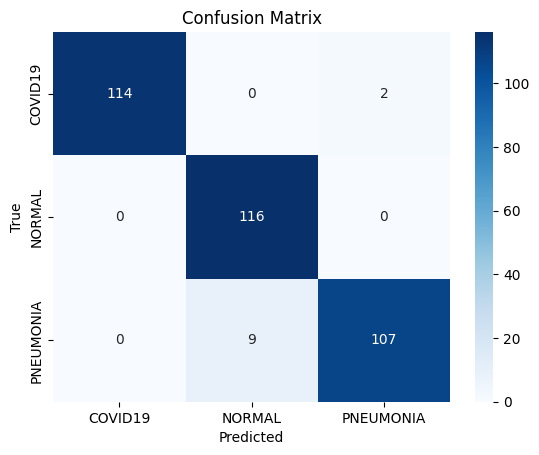

In [7]:
y_true = true_classes.numpy()
y_pred = pred_classes.numpy()

print(classification_report(y_true, y_pred, target_names=test_loader.class_names))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_loader.class_names, yticklabels=test_loader.class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

***
### ***Testing VGG16 with 15 Epochs:***

In [8]:
base_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

model_VGG16 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_VGG16.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_VGG16.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,561,795 (105.14 MB)

 Trainable params: 12,847,107 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
history_VGG16 = model_VGG16.fit(train_loader, validation_data=val_loader, epochs=15)

Epoch 1/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 67s 294ms/step - accuracy: 0.8270 - loss: 14.5257 - val_accuracy: 0.9275 - val_loss: 0.5338
Epoch 2/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 68s 285ms/step - accuracy: 0.9521 - loss: 0.1950 - val_accuracy: 0.9576 - val_loss: 0.1916
Epoch 3/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 73s 260ms/step - accuracy: 0.9703 - loss: 0.1018 - val_accuracy: 0.9538 - val_loss: 0.2319
Epoch 4/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 64s 292ms/step - accuracy: 0.9727 - loss: 0.1045 - val_accuracy: 0.9645 - val_loss: 0.1493
Epoch 5/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 257ms/step - accuracy: 0.9854 - loss: 0.0457 - val_accuracy: 0.9610 - val_loss: 0.1555
Epoch 6/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 63s 282ms/step - accuracy: 0.9868 - loss: 0.0382 - val_accuracy: 0.9482 - val_loss: 0.3312
Epoch 7/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 64s 286ms/step - accuracy: 0.9769 - loss: 0.0755 - val_accuracy: 0.9572 - val_loss: 0.3137
Epoch 8/15
169/169 ━━━━━━━━━━━━━━━━━━━━ 58s 257ms/step - accuracy: 0.9755 - loss: 

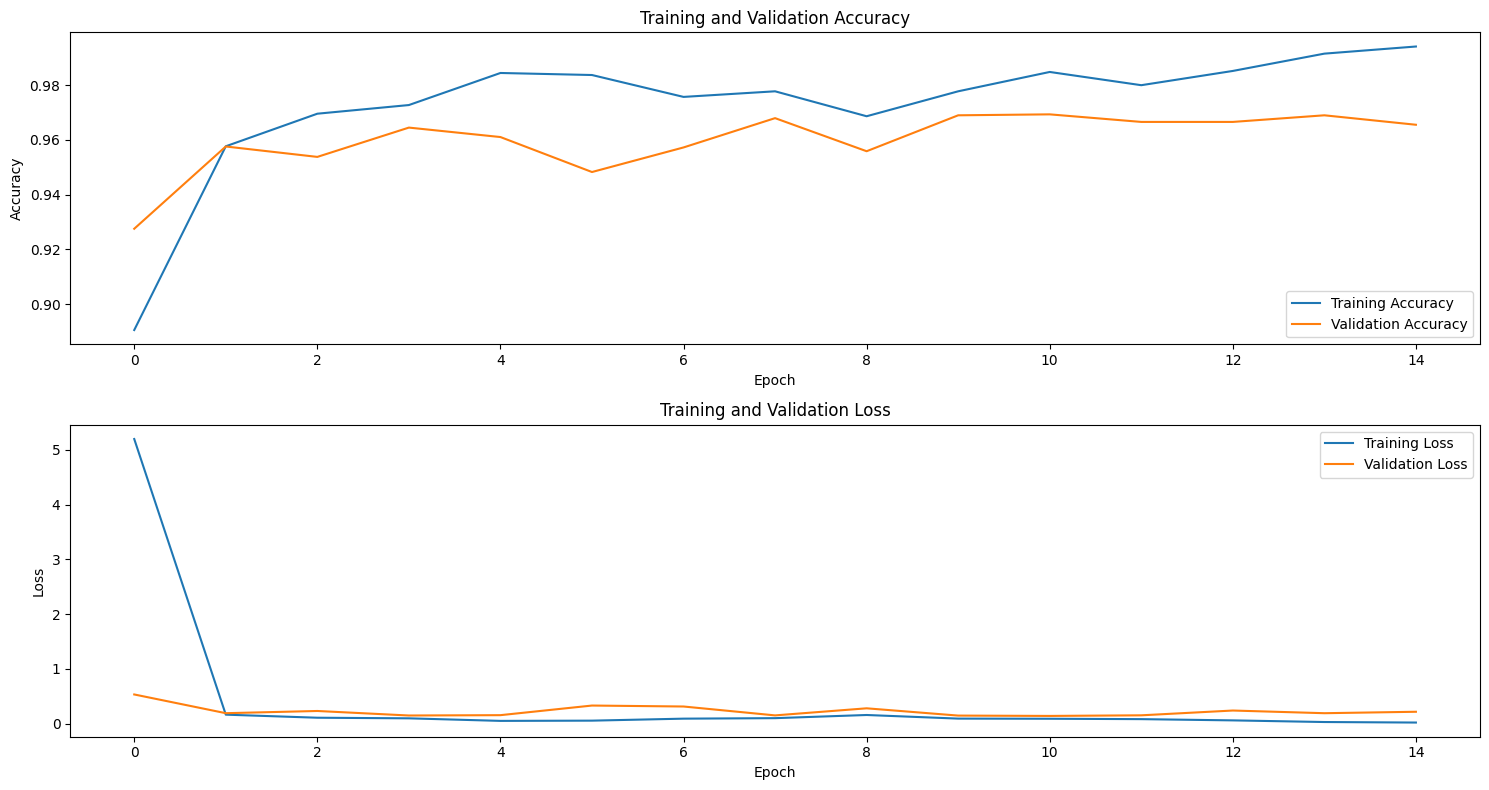

In [10]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
acc = history_VGG16.history['accuracy']
val_acc = history_VGG16.history['val_accuracy']
loss = history_VGG16.history['loss']
val_loss = history_VGG16.history['val_loss']
epochs_range = range(len(acc))

axes[0].plot(epochs_range, acc, label='Training Accuracy')
axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')

axes[1].plot(epochs_range, loss, label='Training Loss')
axes[1].plot(epochs_range, val_loss, label='Validation Loss')
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [11]:
pred_probs = model_VGG16.predict(test_loader)
pred_classes = tf.argmax(pred_probs, axis=1)

true_labels = tf.concat([y for x, y in test_loader], axis=0)
true_classes = tf.argmax(true_labels, axis=1)

test_loss, test_accuracy = model_VGG16.evaluate(test_loader)
print(f"Test Accuracy: {test_accuracy:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.9682 - loss: 0.1175
Test Accuracy: 0.9598


              precision    recall  f1-score   support

     COVID19       1.00      0.97      0.99       116
      NORMAL       0.98      0.92      0.95       116
   PNEUMONIA       0.90      0.98      0.94       116

    accuracy                           0.96       348
   macro avg       0.96      0.96      0.96       348
weighted avg       0.96      0.96      0.96       348



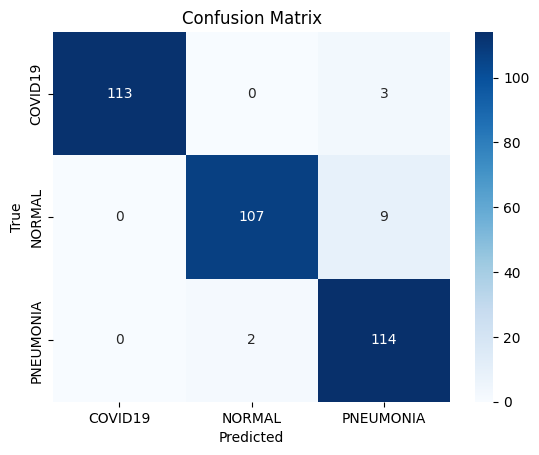

In [12]:
y_true = true_classes.numpy()
y_pred = pred_classes.numpy()

print(classification_report(y_true, y_pred, target_names=test_loader.class_names))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_loader.class_names, yticklabels=test_loader.class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

***
***